In [12]:
%pylab inline
import scipy.stats as stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [13]:
m = 1
cm = 1e-2 * m
mm = 1e-2 * m
nm = 1e-9 * m

In [3]:
def height_to_ϴ(height, height_d, dist, dist_d):
    return (
        # Value
        arctan(height/dist),
        # Uncertainties
        sqrt(
            (height_d*height/(dist**2+height**2))**2+
            (dist_d*dist/(dist**2+height**2))**2
        )
    )

In [4]:
def subtract_offset(y_0, y_0_d, y, yd):
    return y - y_0, sqrt(y_0_d**2 + yd**2)

In [35]:
def spacing_from_height_wavelength(λ, ϴ, ϴ_d, n):
    return (
        # Value
        n*λ / (sin(ϴ)),
        # Uncertainty
        abs(ϴ_d*λ*n / (tan(ϴ) * cos(ϴ)))
    )
    

In [47]:
def wavelength_from_height_spacing(spacing, spacing_d, ϴ, ϴ_d, n):
    return (
        # Value
        spacing * sin(ϴ) / n,
        # Uncertainty
        sqrt(
            (spacing_d * sin(ϴ) / n)**2 + 
            (ϴ_d * spacing*  cos(ϴ) / n)**2
        )
    )
    

In [37]:
def weighted_average(Xs, Xs_d):
    weights = 1/Xs_d**2
    estimate = sum(Xs*weights)/sum(weights)
    estimate_d = 1/sqrt(sum(weights))
    return estimate, estimate_d

In [53]:


# 543nm
λ_green = 543*nm
laser_green = {
    (81.4 * cm, 1*mm) : {
        'Y0': 26.3*cm,
        'Y0_d': 3*mm,
        'Y1': 56.5*cm,
        'Y1_d': 2*mm,
        'Y2': 104.1*cm,
        'Y2_d': 2*mm,
    },
    (98.8 * cm, 1*mm) : {
        'Y0': 27.4*cm,
        'Y0_d': 3*mm,
        'Y1': 61.8*cm,
        'Y1_d': 2*mm,
        'Y2': 117.7*cm,
        'Y2_d': 2*mm,
    },
    (76.7 * cm, 1*mm) : {
        'Y0': 25.8*cm,
        'Y0_d': 3*mm,
        'Y1': 53.3*cm,
        'Y1_d': 2*mm,
        'Y2': 96.2*cm,
        'Y2_d': 2*mm,
    }
}


# 632.8nm
laser_red = {
    (94.6 * cm, 1*mm) : {
        'Y0': 24.2*cm,
        'Y0_d': 3*mm,
        'Y1': 64.4*cm,
        'Y1_d': 2*mm,
        'Y2': 140.2*cm,
        'Y2_d': 2*mm,
    },
    (79.4 * cm, 1*mm) : {
        'Y0': 24.5*cm,
        'Y0_d': 3*mm,
        'Y1': 58.2*cm,
        'Y1_d': 2*mm,
        'Y2': 121.5*cm,
        'Y2_d': 2*mm,
    },
    (97.1 * cm, 1*mm) : {
        'Y0': 24.4*cm,
        'Y0_d': 3*mm,
        'Y1': 65.5*cm,
        'Y1_d': 2*mm,
        'Y2': 143.4*cm,
        'Y2_d': 2*mm,
    }
}




(1601.4763856498803, 13.100962554524942)

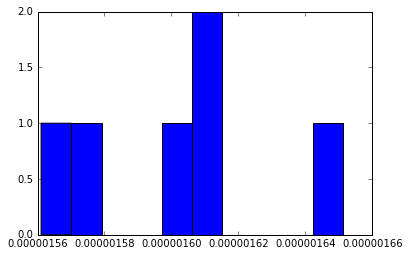

In [54]:

spacings = []
for (L, L_d), values in laser_green.items():
    y1, y1_d = subtract_offset(
        values['Y0'],
        values['Y0_d'],
        values['Y1'],
        values['Y1_d']
    )
    y2, y2_d = subtract_offset(
        values['Y0'],
        values['Y0_d'],
        values['Y2'],
        values['Y2_d']
    )
    ϴ1, ϴ1d = height_to_ϴ(y1, y1_d, L, L_d)
    ϴ2, ϴ2d = height_to_ϴ(y2, y2_d, L, L_d)
    
    spacings.append(spacing_from_height_wavelength(λ_green, ϴ1, ϴ1d, 1))
    spacings.append(spacing_from_height_wavelength(λ_green, ϴ2, ϴ2d, 2))

spacings_and_err = array(spacings)
spacings = spacings_and_err[:,0]
spacings_d = spacings_and_err[:,1]

cd_spacing = mean(spacings)
cd_spacing_d = stats.sem(spacings, ddof=1)


hist(spacings)

cd_spacing/nm, cd_spacing_d/nm



In [55]:
spacings_and_err

array([[  1.60887776e-06,   3.03778149e-08],
       [  1.60602675e-06,   3.92897511e-08],
       [  1.65137347e-06,   2.39256821e-08],
       [  1.60974433e-06,   3.05713876e-08],
       [  1.56106488e-06,   2.81543135e-08],
       [  1.57177112e-06,   3.62091604e-08]])

In [56]:
a, ad = weighted_average(spacings, spacings_d)
a/nm, ad/nm

(1606.5492572119172, 12.334773259312886)

(622.80976003133696, 1.2091191403911727)

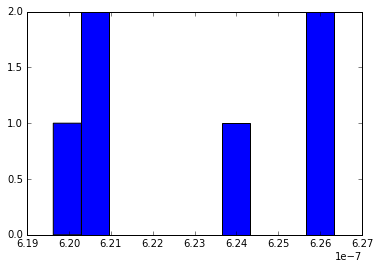

In [57]:

wavelengths_red = []
for (L, L_d), values in laser_red.items():
    y1, y1_d = subtract_offset(
        values['Y0'],
        values['Y0_d'],
        values['Y1'],
        values['Y1_d']
    )
    y2, y2_d = subtract_offset(
        values['Y0'],
        values['Y0_d'],
        values['Y2'],
        values['Y2_d']
    )
    ϴ1, ϴ1d = height_to_ϴ(y1, y1_d, L, L_d)
    ϴ2, ϴ2d = height_to_ϴ(y2, y2_d, L, L_d)
    
    wavelengths_red.append(
        wavelength_from_height_spacing(cd_spacing, cd_spacing_d, ϴ1, ϴ1d, 1)
    )
    wavelengths_red.append(
        wavelength_from_height_spacing(cd_spacing, cd_spacing_d, ϴ2, ϴ2d, 2)
    )

wavelengths_red_and_err = array(wavelengths_red)
wavelengths_red = wavelengths_red_and_err[:,0]
wavelengths_red_err = wavelengths_red_and_err[:,1]

wavelength_red = mean(wavelengths_red)
wavelength_red_d = stats.sem(wavelengths_red, ddof=1)


hist(wavelengths_red)

wavelength_red/nm, wavelength_red_d/nm


In [58]:

b, bd = weighted_average(wavelengths_red, wavelengths_red_err)
b/nm, bd/nm

(621.08357701221064, 5.9899801495378497)